In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Build model with model_architecture.json

In [2]:
import os
import json

with open('../Server/model_architecture.json','r') as file:
    json_data = file.read()
model_architecture = json.loads(json_data)
model = tf.keras.models.model_from_json(model_architecture)
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy","categorical_accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0

# Load full CIFAR10 dataset

In [3]:
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("Shape:")
print(x_train.shape,y_train.shape,x_test.shape, y_test.shape)
print('Example of dataset')
print(x_train.view)


# Flatten label
y_train=y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
print(y_train.shape, y_test.shape)

Shape:
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
Example of dataset
<built-in method view of numpy.ndarray object at 0x0000021DB28B7A50>
(50000,) (10000,)


## Visualize data samples

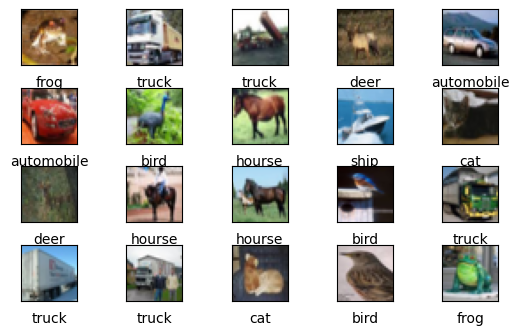

<Figure size 3000x3000 with 0 Axes>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'hourse', 'ship', 'truck']

def plot_categories(x_train, y_train):
  plt.figure(figsize=(30,30))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

plot_categories(x_train, y_train)

## Training model

In [5]:
model_history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 14s 8ms/step - loss: 1.5964 - accuracy: 0.4378 - categorical_accuracy: 0.0953 - val_loss: 1.2687 - val_accuracy: 0.5409 - val_categorical_accuracy: 0.1101
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1835 - accuracy: 0.5798 - categorical_accuracy: 0.0975 - val_loss: 1.0839 - val_accuracy: 0.6246 - val_categorical_accuracy: 0.0920
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0016 - accuracy: 0.6466 - categorical_accuracy: 0.0985 - val_loss: 0.8850 - val_accuracy: 0.6917 - val_categorical_accuracy: 0.1013
Epoch 4/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8913 - accuracy: 0.6856 - categorical_accuracy: 0.1003 - val_loss: 0.8592 - val_accuracy: 0.7036 - val_categorical_accuracy: 0.1061
Epoch 5/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8059 - accuracy: 0.7180 - categorical_accuracy: 0.0997 - val_loss: 0.7676 - val_a

## Eveluation the model

In [6]:
loss, accuracy, categorical_accuracy = model.evaluate(x_test, y_test, verbose=2)
print('\nModel Test accuracy:', accuracy)
print('\nModel Test loss:', loss)

313/313 - 1s - loss: 0.7481 - accuracy: 0.7541 - categorical_accuracy: 0.1080 - 839ms/epoch - 3ms/step

Model Test accuracy: 0.7541000247001648

Model Test loss: 0.7480711936950684


## Predict and plot the confussion matrix

313/313 [==============================] - 1s 2ms/step


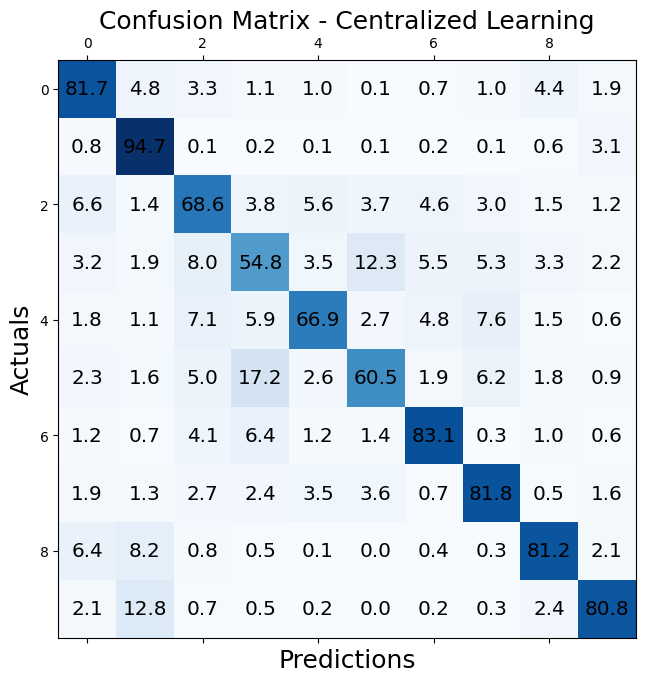

In [7]:
predictions = model.predict(x_test)
model_preds = predictions.argmax(axis=1)
confusion  = tf.math.confusion_matrix(
    labels=y_test,
    predictions=model_preds,
    num_classes=10    
)
conf_matrix = np.array(confusion)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha = 1)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j]/10, va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Centralized Learning', fontsize=18)
plt.show()        
plt.show()

## Plot the loss and accuracy

[0.5408999919891357, 0.6245999932289124, 0.6916999816894531, 0.7035999894142151, 0.7383000254631042, 0.7484999895095825, 0.7558000087738037, 0.7526999711990356, 0.7633000016212463, 0.7552000284194946] [1.2687431573867798, 1.0839122533798218, 0.8849515914916992, 0.8591700196266174, 0.7675946354866028, 0.7338659167289734, 0.709019124507904, 0.722883939743042, 0.70146644115448, 0.7454261779785156]


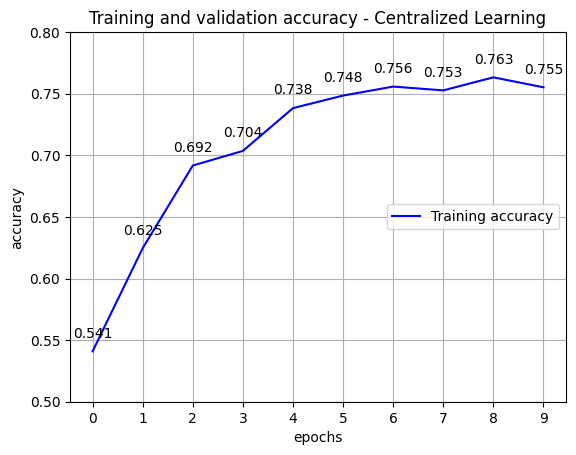

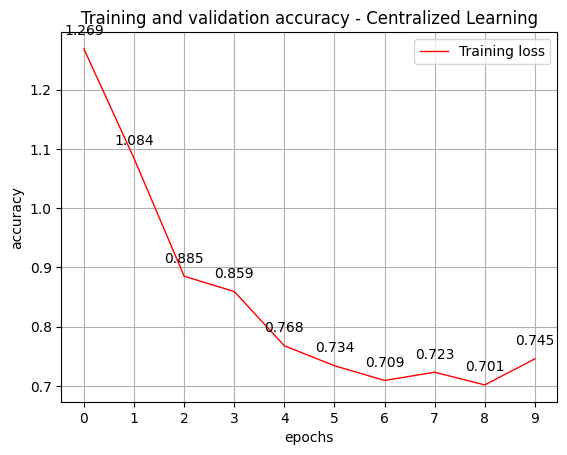

In [30]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# categorical_acc = model_history.history['categorical_accuracy']
print(val_acc, val_loss)

epochs = range(len(acc))
plt.grid()
# plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Training accuracy')
# plt.plot(epochs, loss, 'r', linestyle='dashed', linewidth=1, label='Training loss')
# plt.plot(epochs, val_loss, 'r', linestyle='dashed',linewidth=1,label='Validation loss')
plt.yticks(np.arange(0.5, 0.8, step=0.05))
plt.title('Training and validation accuracy - Centralized Learning')
plt.xlabel('epochs')
plt.xticks(epochs)
plt.ylabel('accuracy')
plt.legend(loc=5)
for x,y in zip(epochs,val_acc):
    label = "{:.3f}".format(y)
    plt.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center')
plt.show()

plt.grid()
plt.plot(epochs, val_loss, 'r',linewidth=1,label='Training loss')
plt.title('Training and validation accuracy - Centralized Learning')
plt.xlabel('epochs')
plt.xticks(epochs)
plt.ylabel('accuracy')
plt.legend(loc=0)
for x,y in zip(epochs,val_loss):
    label = "{:.3f}".format(y)
    plt.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center')
plt.show()